In [1]:
import zipfile
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with zipfile.ZipFile("archive.zip", 'r') as zip_ref:
    zip_ref.extractall("data")

In [4]:
df = pd.read_csv("Mall_Customers.csv")

In [5]:
if 'id' in df.columns:
    df.drop(columns=['id'], inplace=True)
if 'Unnamed: 32' in df.columns:
    df.drop(columns=['Unnamed: 32'], inplace=True)
if 'diagnosis' in df.columns:
    df.drop(columns=['diagnosis'], inplace=True)

In [6]:
df.fillna(df.mean(numeric_only=True), inplace=True)

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

In [10]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [11]:
df['Cluster'] = clusters

In [12]:
from sklearn.decomposition import PCA

In [13]:
df_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=True)

In [14]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(X_scaled)
df['PCA1'] = reduced[:, 0]
df['PCA2'] = reduced[:, 1]

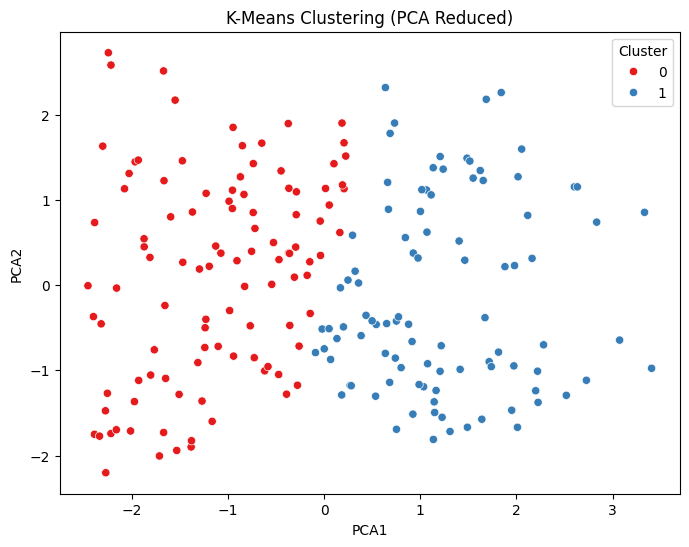

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set1')
plt.title('K-Means Clustering (PCA Reduced)')
plt.show()